# Guided Project: Predicting Car Prices

## Introduction to the data set

For this particular project, I will pratice the machine learning workflow by predicting a car's market price using certain features. The data set contains various information on certain cars and have multiple tecnical aspects such as motor's displacement, weight and etc. I will read in the data set and look at the data. After looking at the data as well, I noticed that the column names were different. Therefore, I renamed the columns and viewed again the first 5 rows with the updated column names. From the data as well, I will collect only the columns with continous values. 

In [1]:
import pandas as pd 
import numpy as np 

columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration','num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = columns)
print(cars.info())
cars.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-nul

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
continuous_values = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values]

## Data Cleaning

I learned in this course that I cannot have any missing values in a machine learning model. I will normalize the values to have a good rescaling of the data so that all values will only range from 0 to 1. 

In [3]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars = numeric_cars.astype(float)
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()
numeric_price_column = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = numeric_price_column

## Univariate Model

I will start with some univariate k-nearest neighbors models. Starting with a simple model and then moving to a more complex odel will help me understand the features of the model better. 

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_column, target_column, df): 
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    random_df_half = int(len(random_df) / 2)
    train = random_df.iloc[0:random_df_half]
    test = random_df.iloc[random_df_half:]
    knn = KNeighborsRegressor()
    knn.fit(train[[train_column]], train[target_column])
    predictions = knn.predict(test[[train_column]])
    rmse = np.sqrt(mean_squared_error(predictions, test[target_column]))
    return rmse

k_rmse_results = {}
train_cols = numeric_cars.columns.drop('price')
for k in train_cols:
    rmse_final = knn_train_test(k, 'price', numeric_cars)
    k_rmse_results[k] = rmse_final
k_rmse_results
k_rmse_results = pd.Series(k_rmse_results)
k_rmse_results.sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [5]:
def knn_train_test(train_column, target_column, df): 
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    random_df_half = int(len(random_df) / 2)
    train = random_df.iloc[0:random_df_half]
    test = random_df.iloc[random_df_half:]
    k_val = [1,3,5,7,9]
    k_rmse_values = {}
    for value in k_val:
        knn = KNeighborsRegressor(n_neighbors = value)
        knn.fit(train[[train_column]], train[target_column])
        predictions = knn.predict(test[[train_column]])
        rmse = np.sqrt(mean_squared_error(predictions, test[target_column]))
        k_rmse_values[value] = rmse
    return k_rmse_values

k_rmse_results = {}
train_columns = numeric_cars.columns.drop('price')
for k in train_columns:
    rmse_value = knn_train_test(k, 'price', numeric_cars)
    k_rmse_results[k] = rmse_value
k_rmse_results


{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

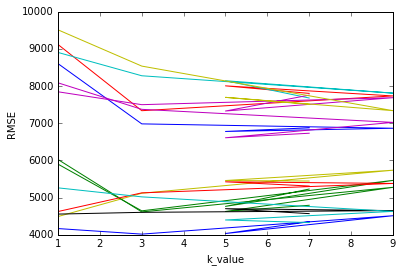

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
for k, v in k_rmse_results.items(): 
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y)
    plt.xlabel('k_value')
    plt.ylabel('RMSE')

## Multivariate Model 

In [7]:
average_feature_rmse = {}

for k,v in k_rmse_results.items():
    average_rmse = np.mean(list(v.values()))
    average_feature_rmse[k] = average_rmse

average_feature_rmse = pd.Series(average_feature_rmse)
sorted_values = average_feature_rmse.sort_values()
print(sorted_values)
features_sorted = sorted_values.index


horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [19]:
def knn_train_test(train_columns, target_columns, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    random_df_half = int(len(random_df)/2)
    train_df = random_df.iloc[0:random_df_half]
    test_df = random_df.iloc[random_df_half:]
    
    k = [5]
    rmse_list = {}
    
    for value in k:
        knn = KNeighborsRegressor(n_neighbors = value)
        knn.fit(train_df[train_columns], train_df[target_columns])
        predictions = knn.predict(test_df[train_columns])
        rmse = np.sqrt(mean_squared_error(predictions, test_df[target_columns]))
        rmse_list[value] = rmse
    return rmse_list

k_results = {}

for value in range(2,7):
    k_results['{} best features'.format(value)] = knn_train_test(features_sorted[ :value], 'price', numeric_cars)

k_results
    

{'2 best features': {5: 3589.3132622073304},
 '3 best features': {5: 3305.9401397969677},
 '4 best features': {5: 3358.6915801682458},
 '5 best features': {5: 3665.546673045813},
 '6 best features': {5: 3628.261188214127}}

## Hyperparameter Tuning

In [20]:
def knn_train_test(train_columns, target_columns, df):
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    random_df_half = int(len(random_df)/2)
    train_df = random_df.iloc[0:random_df_half]
    test_df = random_df.iloc[random_df_half:]
    
    k = [i for i in range(1,25)]
    rmse_list = {}
    
    for value in k:
        knn = KNeighborsRegressor(n_neighbors = value)
        knn.fit(train_df[train_columns], train_df[target_columns])
        predictions = knn.predict(test_df[train_columns])
        rmse = np.sqrt(mean_squared_error(predictions, test_df[target_columns]))
        rmse_list[value] = rmse
    return rmse_list

k_results = {}

for value in range(2,6):
    k_results['{} best features'.format(value)] = knn_train_test(features_sorted[ :value], 'price', numeric_cars)

k_results
    

{'2 best features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787},
 '3 best features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 4371.771103372868

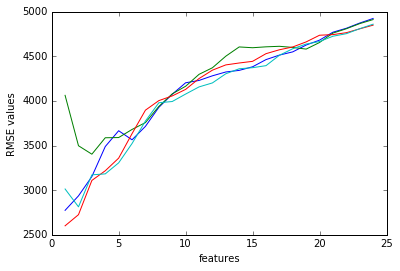

In [22]:
%matplotlib inline
for k, v in k_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('features')
    plt.ylabel('RMSE values')

## Next Steps

The next steps I will take for this project in the future are two steps: 
    
   1) Modify the knn_train_test() function to use k-fold cross 
      k-fold cross validation instead of test/train validation.
   
   2) Modify the knn_train_test() function to perform the data 
      cleaning as well. 